In [1]:
import qiskit

In [2]:
provider = qiskit.IBMQ.load_account()

In [3]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx
from collections import OrderedDict

from qiskit import Aer, IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
#from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver, QAOA
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram

from qiskit.algorithms.optimizers import COBYLA, SPSA
from qiskit.opflow import X, Y, Z, I, CX, T, H, S, PrimitiveOp, StateFn
from qiskit.providers.aer import noise

# Import error mitigation functions
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter

import networkx as nx
import numpy as np
import pylab

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer,  CplexOptimizer, CobylaOptimizer, ADMMOptimizer
#from qiskit_optimization.applications import Maxcut

from qiskit import BasicAer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import SPSA, COBYLA

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import QasmSimulator

from qiskit_optimization.algorithms import WarmStartQAOAOptimizer

/Users/lachermeier/.pyenv/versions/3.8.10/lib/python3.8/site-packages/qiskit/optimization/__init__.py:92: DeprecationWarning: The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('optimization', 'qiskit_optimization', 'qiskit-optimization')


In [5]:
from shared.graph_helper import *
from shared.QiskitMaxcut import *

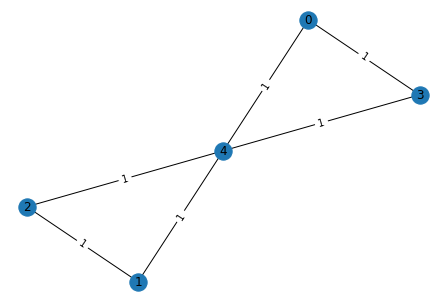

In [7]:
graph = generate_butterfly_graph(with_weights=False)
max_cut = Maxcut(graph)
draw_graph(graph)

In [8]:
# Run quantum algorithm QAOA on qasm simulator
spsa = SPSA(maxiter=50)
backend = BasicAer.get_backend('qasm_simulator')
reps = 2
max_cut_qubo = max_cut.to_quadratic_program()

qaoa = QAOA(optimizer=spsa, quantum_instance=backend, reps=reps) 
algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(max_cut_qubo)

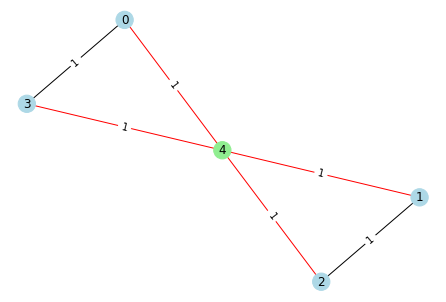

In [9]:
max_cut.draw(result)

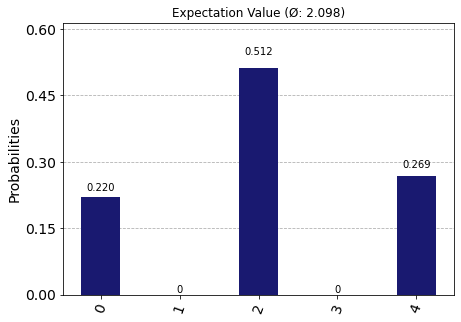

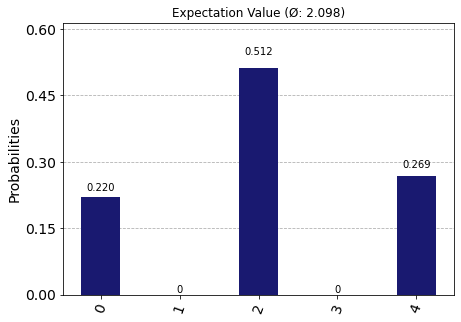

In [10]:
mean, distribution = max_cut.analyse(result, print_output=False)
plot_histogram(distribution, color='midnightblue', title=f"Expectation Value (Ø: {mean:.3f})")

In [11]:
pylab.rcParams['figure.figsize'] = (12, 4)
pylab.plot(counts1, values1)
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Convergence with no noise')

NameError: name 'counts1' is not defined

In [41]:
best_cut = max_cut.get_gset_result([0, 1, 0, 1, 0])
best_cut = [0, 1, 0, 1, 0]

In [38]:
partition = max_cut.interpret(result)
partition

[[0, 2, 4], [1, 3]]

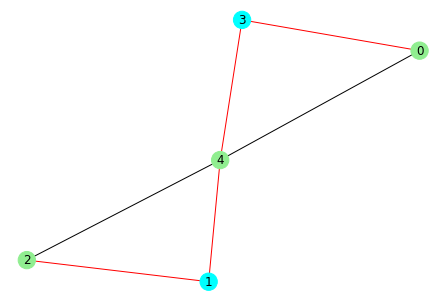

In [43]:
nx.draw(
    graph, labels={i: str(i) for i in graph.nodes()},
    node_color=["cyan" if b == 1 else 'lightgreen' for b in best_cut],
    edge_color=['red' if best_cut[a] != best_cut[b] else 'black' for a, b in graph.edges()]
)

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table